# 📦 Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# 🔽 Download NLTK resources (run once)

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# 📂 Load dataset

In [4]:
from google.colab import files
uploaded = files.upload()


Saving Spam_Data.csv to Spam_Data.csv


In [6]:
df = pd.read_csv("Spam_Data.csv")

# 🧐 Check first few rows

In [7]:
print(df.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


Dataset Rows & Columns count

In [23]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])


Number of rows are:  5157
Number of columns are:  3


Dataset Information


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    5157 non-null   object
 1   Message     5157 non-null   object
 2   clean_text  5157 non-null   object
dtypes: object(3)
memory usage: 161.2+ KB


#Understanding The Variables

In [28]:
df.columns

Index(['Category', 'Message', 'clean_text'], dtype='object')

In [29]:
df.describe(include= 'all').round(2)

,Category,Message,clean_text
count,5157,5157,5157
unique,2,5157,5071
top,ham,Rofl. Its true to its name,private account statement show unredeemed poin...
freq,4516,1,7


Check Unique Values for each variable.

In [30]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Category is 2
No. of unique values in Message is 5157
No. of unique values in clean_text is 5071


#Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

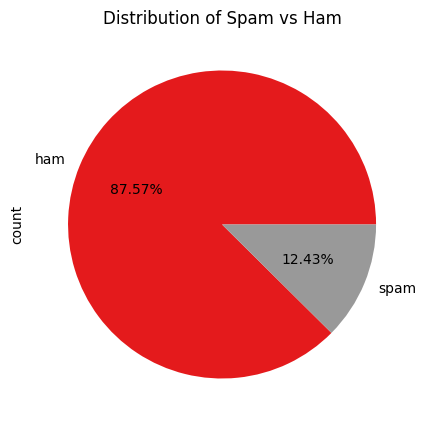

In [32]:
import matplotlib.pyplot as plt  # <-- make sure this is included

# Count the values in the 'Category' column
spread = df['Category'].value_counts()

# Set the figure size
plt.rcParams['figure.figsize'] = (5,5)

# Plot the pie chart
spread.plot(kind='pie', autopct='%1.2f%%', cmap='Set1')
plt.title('Distribution of Spam vs Ham')

# Display the chart
plt.show()


#Duplicate Values

In [26]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [9]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [33]:
df_spam = df[df['Category']=='spam'].copy()

Most Used Words in Spam Messages

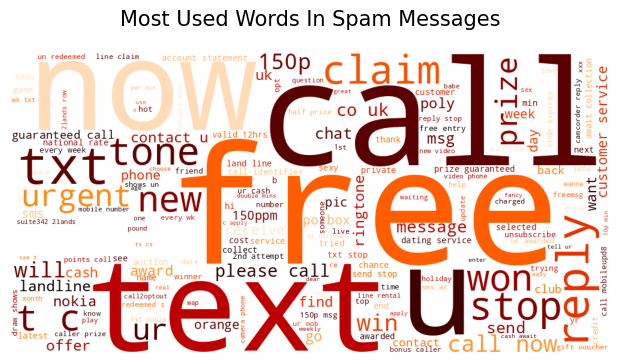

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# Remove the stopwords
stopwords = set(STOPWORDS)

# Iterate through the 'Message' column of spam messages
for val in df_spam['Message']:
    val = str(val)  # Ensure it's a string
    tokens = val.split()  # Split into words
    tokens = [word.lower() for word in tokens]  # Lowercase
    comment_words += " ".join(tokens) + " "

# Generate the WordCloud
wordcloud = WordCloud(width=1000, height=500,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10,
                      max_words=1000,
                      colormap='gist_heat_r').generate(comment_words)

# Plot the WordCloud
plt.figure(figsize=(6,6), facecolor=None)
plt.title('Most Used Words In Spam Messages', fontsize=15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


#Feature Engineering & Data Pre-processing

In [10]:
def clean_text(text):
    text = text.lower()                                   # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)   # remove URLs
    text = re.sub(r'\d+', '', text)                       # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = text.split()                                 # tokenize
    tokens = [w for w in tokens if w not in stop_words]   # remove stopwords
    tokens = [lemmatizer.lemmatize(w) for w in tokens]    # lemmatize
    return ' '.join(tokens)


In [16]:
df['clean_text'] = df['Message'].apply(clean_text)


In [18]:
X = df['Message']
y = df['Category']

In [37]:
from sklearn.model_selection import train_test_split

# Assuming 'Category' is the target column with spam/ham labels
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.25, random_state=42)


In [38]:
vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [39]:
print("Training data shape:", X_train_vec.shape)
print("Testing data shape:", X_test_vec.shape)

Training data shape: (3867, 3000)
Testing data shape: (1290, 3000)


In [40]:
import pickle
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
pickle.dump((X_train_vec, X_test_vec, y_train, y_test), open('processed_data.pkl', 'wb'))

print("✅ Data preprocessing completed successfully!")

✅ Data preprocessing completed successfully!
